# BMIS-2542: Data Programming Essentials with Python 
##### Katz Graduate School of Business, Spring 2021


## Session-3: Data Wrangling  with Pandas - I

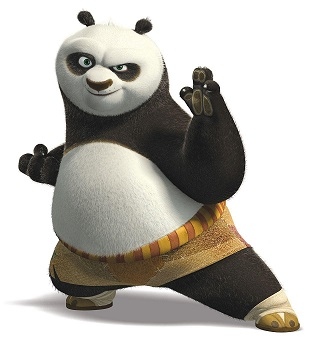

In [1]:
import pandas as pd
import numpy as np

Pandas has two workhorse data structures: **Series** and **DataFrame**.

## Series

A series is a one-dimensional array-like object containing a sequence of values and an associated array of data labels, called its index.

In [2]:
mySeries = pd.Series([4, 7, -5, 3])
mySeries

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
# Often, it is desirable to create a Series with an index identifying each data point with a label.
mySeries2 = pd.Series([4, 7, -5, 3], index= ['a','b', 'c','d'] )
mySeries2

a    4
b    7
c   -5
d    3
dtype: int64

In [4]:
# A Series can also be created by passing a dictionary
seriesDict = {'Ohio':35000, 'Texas':71000,'Oregon':16000,'Utah':5000}
mySeries3 =  pd.Series(seriesDict)
mySeries3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [5]:
# selecting values
mySeries3['Texas']

71000

In [6]:
mySeries3[(mySeries3>5000) & (mySeries3<70000)]

Ohio      35000
Oregon    16000
dtype: int64

## DataFrame

The most common method to create a `DataFrame` is from a dictionary of equal-length lists.<br>
Each entry in the dictionary contains the column name and the values associated with it in the form of a list.<br>
Columns in the `DataFrame` can be arranged at construction time by entering a keyword **columns** with a list of the names of the columns ordered as we want.<br>
The index of each row is created automatically, taking the position of its elements inside the entry lists, starting from 0.

In [7]:
dictFootball = {'year': [2010, 2011, 2010, 2011, 2010, 2011],
                'team': ['FCBarcelona', 'FCBarcelona', 'RMadrid', 'RMadrid', 'ValenciaCF',
                         'ValenciaCF'],
                'wins':   [30, 28, 29, 32, 21, 17],
                'draws':  [6, 7, 5, 4, 8, 10],
                'losses': [2, 3, 4, 2,  9, 11],
                'test':[-1,-2,1,2,'Not Given','Unknown']
               }
football = pd.DataFrame(dictFootball, columns=['year', 'team', 'wins', 'draws', 'losses', 'test'])
football

,year,team,wins,draws,losses,test
0,2010,FCBarcelona,30,6,2,-1
1,2011,FCBarcelona,28,7,3,-2
2,2010,RMadrid,29,5,4,1
3,2011,RMadrid,32,4,2,2
4,2010,ValenciaCF,21,8,9,Not Given
5,2011,ValenciaCF,17,10,11,Unknown


In [8]:
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    6 non-null      int64 
 1   team    6 non-null      object
 2   wins    6 non-null      int64 
 3   draws   6 non-null      int64 
 4   losses  6 non-null      int64 
 5   test    6 non-null      object
dtypes: int64(4), object(2)
memory usage: 416.0+ bytes


In [9]:
football['draws'].dtype # data type

dtype('int64')

In [10]:
football['draws'] = football['draws'].astype(float)
football

,year,team,wins,draws,losses,test
0,2010,FCBarcelona,30,6.0,2,-1
1,2011,FCBarcelona,28,7.0,3,-2
2,2010,RMadrid,29,5.0,4,1
3,2011,RMadrid,32,4.0,2,2
4,2010,ValenciaCF,21,8.0,9,Not Given
5,2011,ValenciaCF,17,10.0,11,Unknown


In [11]:
football['draws'].dtype

dtype('float64')

In [12]:
# handle the data type inconsistency (i.e., mixed data types) in the 'test' column.
# suppose we need to create a numeric variable based on the test column values 
football['test_num'] = pd.to_numeric(football.test, errors = 'coerce')
football

,year,team,wins,draws,losses,test,test_num
0,2010,FCBarcelona,30,6.0,2,-1,-1.0
1,2011,FCBarcelona,28,7.0,3,-2,-2.0
2,2010,RMadrid,29,5.0,4,1,1.0
3,2011,RMadrid,32,4.0,2,2,2.0
4,2010,ValenciaCF,21,8.0,9,Not Given,NaN
5,2011,ValenciaCF,17,10.0,11,Unknown,NaN


In [13]:
football.dtypes

year          int64
team         object
wins          int64
draws       float64
losses        int64
test         object
test_num    float64
dtype: object

## Reading Tabular Data

Let's use the [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult) for our example analysis. A CSV (comma separated values) file based on this dataset is available on Canvas. Download it to your Jupyter directory. 

We can read csv files into a DataFrame by calling the [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv) method in Pandas. In addition to the `path` to the file, we add the `na_values` key argument to this method along with the character that represents "not-available data" in the file. <br>CSV files usually come with a header that contains the column names. If this is the case, we can use the `usecols` parameter to select which columns in the file we will use.

In [15]:
dfAdults = pd.read_csv('adult.csv', na_values= '?', usecols=['age','workclass','fnlwgt','education','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income_class'])
dfAdults

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**NOTE**: In addition to reading CSV files, Pandas also has functions for reading files in other formats such as Excel, HDF5, tabulated files or even the content from the clipboard (read_excel(), read_hdf(), read_table(), read_clipboard()). Upon reading the contect, every such function returns a `DataFrame`. You can read more about these functions [here](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

In [16]:
# you can write a DataFrame to a file. The output file is stored in your current working  directory.
dfAdults.to_csv('AdultDataFrame.csv', index = False, na_rep = '?')

In [17]:
# Get DataFrame size
dfAdults.shape

(32561, 14)

In [18]:
dfAdults.head(10) # Returns the first five rows. Can pass the number of rows we need to view as an argument.

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [19]:
dfAdults.tail() # Returns the last 5 rows

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [20]:
# Get all the columns in the DataFrame as a list. 
list(dfAdults)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income_class']

In [21]:
list(dfAdults.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income_class']

In [22]:
# Quickly describe the dataframe
dfAdults.describe()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


### Selection and Filtering

In [23]:
# A column in a DataFrame can be retrieved as a Series, using dict/list/attribute-like notation 
dfAdults['education']

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

In [24]:
dfAdults.education # attribute like notation

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

In [25]:
type(dfAdults.education)

pandas.core.series.Series

In [26]:
dfAdults[['age', 'race']]

,age,race
0,39,White
1,50,White
2,38,White
3,53,Black
4,28,Black
...,...,...
32556,27,White
32557,40,White
32558,58,White
32559,22,White


In [27]:
# selecting specific rows
dfAdults[5:10]

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [28]:
dfAdults[:2]

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [29]:
dfAdults.education.unique() # get the unique values in the 'education' column

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [30]:
dfAdults.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [31]:
# you can filter out rows based on certain conditions
masters = dfAdults[(dfAdults.education == 'Masters') & (dfAdults.age>30) ]
masters

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
47,44,Private,128354,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
87,33,Private,202051,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32504,50,Private,208630,Masters,Divorced,Sales,Not-in-family,White,Female,0,0,50,United-States,>50K
32513,46,Private,42972,Masters,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,>50K
32544,31,Private,199655,Masters,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32553,32,Private,116138,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


### Selection using `loc`
You can use `loc` to select a subset of rows and columns.

In [32]:
dfAdults.loc[2:6]

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [33]:
dfAdults.loc[2:6, ['age','sex']] # note the selected list of columns: age and sex

,age,sex
2,38,Male
3,53,Male
4,28,Female
5,37,Female
6,49,Female


In [34]:
dfAdults.loc[2:6, 'age':'sex'] # note the range of columns selected: age-->sex

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female


In [35]:
dfAdults.loc[(dfAdults.education=='Masters'), 'age':'sex']

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female
47,44,Private,128354,Masters,Divorced,Exec-managerial,Unmarried,White,Female
87,33,Private,202051,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male
...,...,...,...,...,...,...,...,...,...
32504,50,Private,208630,Masters,Divorced,Sales,Not-in-family,White,Female
32513,46,Private,42972,Masters,Married-civ-spouse,Prof-specialty,Wife,White,Female
32544,31,Private,199655,Masters,Divorced,Other-service,Not-in-family,Other,Female
32553,32,Private,116138,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male


### <mark>Exercise</mark>
1. Select all Females who work for the Federal Government (work class column), but from countries other than the United States
2. Select all who have a Bachelors degree **or** who earn more than 50K
3. Get the education level and the income class of all people who are never-married.

In [48]:
dfAdults.loc[(dfAdults.sex=='Female') & (dfAdults.workclass=='Federal-gov') & (dfAdults.native_country!='United-States')]

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
1142,59,Federal-gov,212448,HS-grad,Widowed,Sales,Unmarried,White,Female,0,0,40,Germany,<=50K
1281,42,Federal-gov,158926,Assoc-acdm,Divorced,Prof-specialty,Unmarried,Asian-Pac-Islander,Female,0,0,40,Philippines,>50K
2137,42,Federal-gov,153143,Some-college,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,Puerto-Rico,<=50K
2330,53,Federal-gov,173093,Some-college,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,1887,40,Philippines,>50K
4281,64,Federal-gov,199298,7th-8th,Widowed,Other-service,Unmarried,White,Female,0,0,30,Puerto-Rico,<=50K
6395,24,Federal-gov,215115,Bachelors,Never-married,Tech-support,Own-child,White,Female,0,0,40,NaN,<=50K
7062,31,Federal-gov,139455,Bachelors,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,Cuba,<=50K
7284,40,Federal-gov,163215,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,NaN,<=50K
7615,46,Federal-gov,233555,HS-grad,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,NaN,<=50K
7829,35,Federal-gov,20469,Some-college,Divorced,Exec-managerial,Unmarried,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K


In [50]:
dfAdults.loc[(dfAdults.education=='Bachelors') | (dfAdults.income_class=='>50k')]

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32536,34,Private,160216,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K


In [54]:
dfAdults.loc[dfAdults.marital_status=='Never-married', ['education', 'income_class']]

,education,income_class
0,Bachelors,<=50K
8,Masters,>50K
12,Bachelors,<=50K
13,Assoc-acdm,<=50K
16,HS-grad,<=50K
...,...,...
32537,HS-grad,<=50K
32548,Prof-school,<=50K
32553,Masters,<=50K
32555,Some-college,<=50K


In [56]:
dfAdults[dfAdults.marital_status=='Never-married'][['education', 'income_class']]

,education,income_class
0,Bachelors,<=50K
8,Masters,>50K
12,Bachelors,<=50K
13,Assoc-acdm,<=50K
16,HS-grad,<=50K
...,...,...
32537,HS-grad,<=50K
32548,Prof-school,<=50K
32553,Masters,<=50K
32555,Some-college,<=50K


### Creating/Removing Columns

In [57]:
# assigning a column that doesn't exist will create a new column. 
# Let's create the new column 'test_column'
dfAdults['test_column'] = 10000
dfAdults.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,test_column
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,10000
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10000
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,10000
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,10000
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,10000


In [58]:
dfAdults['prod'] = dfAdults.age * dfAdults.fnlwgt
dfAdults.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,test_column,prod
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,10000,3023124
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10000,4165550
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,10000,8194548
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,10000,12440213
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,10000,9475452


In [59]:
# Let's create a new column ("from_US") of boolean values that contains True if the native_country is United-States
dfAdults['from_US'] = dfAdults.native_country == 'United-States'
dfAdults.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,test_column,prod,from_US
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,10000,3023124,True
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10000,4165550,True
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,10000,8194548,True
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,10000,12440213,True
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,10000,9475452,False


In [60]:
dfAdults['from_US'] = dfAdults['from_US'].astype('int64')
dfAdults.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,test_column,prod,from_US
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,10000,3023124,1
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10000,4165550,1
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,10000,8194548,1
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,10000,12440213,1
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,10000,9475452,0


In [61]:
dfAdults['age'].max()

90

In [62]:
# create new column by discretization/binning
ages = dfAdults['age']
bins = [0,30,60,100] # (0,30], (30,60], (60,100)))
bin_names = ['Youth', 'MiddleAged', 'Senior']

dfAdults['age_category'] = pd.cut(ages,bins,labels=bin_names)
print(dfAdults.age_category.value_counts())
dfAdults

MiddleAged    19657
Youth         10572
Senior         2332
Name: age_category, dtype: int64


,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,test_column,prod,from_US,age_category
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,10000,3023124,1,MiddleAged
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10000,4165550,1,MiddleAged
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,10000,8194548,1,MiddleAged
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,10000,12440213,1,MiddleAged
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,10000,9475452,0,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,10000,6947154,1,Youth
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,10000,6174960,1,MiddleAged
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,10000,8810780,1,MiddleAged
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,10000,4432780,1,Youth


In [63]:
# remove a column using the del function. Let's remove the newly created test_column
del dfAdults['test_column']
dfAdults.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,prod,from_US,age_category
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,3023124,1,MiddleAged
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,4165550,1,MiddleAged
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,8194548,1,MiddleAged
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,12440213,1,MiddleAged
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,9475452,0,Youth


In Pandas, the functions that change the contents of a `DataFrame`, will normally return a copy of the modified data, instead of overwriting the original `DataFrame`. Therefore, if you do not want to keep the old values, you can set the keyword `inplace` to `True`. By default, this keyword is set to `False`, meaning that a copy of the data is returned. 

In [64]:
# Let's remove the column "from_US" using the drop method
dfAdults.drop(columns=['from_US']) 
dfAdults.head() # note that 'from_US' column is still there in dfAdults after the drop

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,prod,from_US,age_category
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,3023124,1,MiddleAged
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,4165550,1,MiddleAged
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,8194548,1,MiddleAged
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,12440213,1,MiddleAged
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,9475452,0,Youth


In [65]:
# Let's remove the column "from_US" using the drop method and inplace=True
dfAdults.drop(columns=['from_US'], inplace=True) # Alternatively, drop('from_US', axis = 1) 
dfAdults.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,prod,age_category
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,3023124,MiddleAged
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,4165550,MiddleAged
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,8194548,MiddleAged
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,12440213,MiddleAged
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,9475452,Youth


if we want to remove a row, we can use the `drop` function. We need to specify the index of the row we want to remove. 

In [66]:
# drop rows by index
dfAdults.drop([0,1], inplace=True)
dfAdults.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,prod,age_category
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,8194548,MiddleAged
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,12440213,MiddleAged
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,9475452,Youth
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,10529534,MiddleAged
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,7849163,MiddleAged


## Summarizing and Computing Descriptive Statistics
The following list shows the most common aggregation functions available.

| Function  | Description | 
|-----------|-------------|
| count()   |Number of not-null observations|  
| sum()     |Sum of values|
| mean()    |Mean of values            | 
| median()  |Arithmetic median of values             |
| min()     |Minimum|
| max()     |Maximum|
| prod()    |Product of values|
| std()     |Unbiased standard deviation|
| var()     |Unbiased variance|

If a function is applied to a `DataFrame` or a selection of rows and columns, then you can specify if the function should be applied to the rows for each column  (putting the **axis=0** keyword on the invocation of the function), or it should be applied on the columns for each row (putting the **axis=1** keyword on the invocation of the function).

In [67]:
# Maximum value of age column
dfAdults.age.max() 

90

In [68]:
# Row-wise Max: Maximum value of each column across all rows (axis = 0)
dfAdults.max(axis = 0)

age                         90
fnlwgt                 1484705
education         Some-college
marital_status         Widowed
relationship              Wife
race                     White
sex                       Male
capital_gain             99999
capital_loss              4356
hours_per_week              99
income_class              >50K
prod                  61475400
age_category            Senior
dtype: object

In [69]:
dfMales = dfAdults[dfAdults.sex == 'Male'] 
dfFemales = dfAdults[dfAdults.sex == 'Female'] 
dfMalesHighIncome = dfAdults[(dfAdults.sex == 'Male') & (dfAdults.income_class=='>50K')] 
dfFemalesHighIncome = dfAdults[(dfAdults.sex == 'Female') & (dfAdults.income_class=='>50K')] 
dfHighIncome = dfAdults[dfAdults.income_class=='>50K']

print('The % of people with high income:', int(len(dfHighIncome)/len(dfAdults)*100), '%.') 
print('The % of men with high income:', int(len(dfMalesHighIncome)/len(dfMales)*100), '%.') 
print('The % of women with high income:', int(len(dfFemalesHighIncome)/len(dfFemales)*100), '%.') 
print('The average age of men:', dfMales['age'].mean(), '.') 
print('The average age of women:', dfFemales['age'].mean(), '.')
print('The average age of high-income men:', dfMalesHighIncome['age'].mean(), '.') 
print('The average age of high-income women:', dfFemalesHighIncome['age'].mean(), '.')

The % of people with high income: 24 %.
The % of men with high income: 30 %.
The % of women with high income: 10 %.
The average age of men: 39.4330824306958 .
The average age of women: 36.85823043357163 .
The average age of high-income men: 44.62578805163614 .
The average age of high-income women: 42.125530110262936 .


In [70]:
male_mu = dfMales['age'].mean()
female_mu = dfFemales['age'].mean()
male_var = dfMales['age'].var()
female_var = dfFemales['age'].var()
male_std = dfMales['age'].std()
female_std = dfFemales['age'].std()
print('Statistics of age for Men: mu:', male_mu, 'var:', male_var, 'std:', male_std)
print('Statistics of age for Women: mu:', female_mu, 'var:', female_var, 'std:', female_std)

Statistics of age for Men: mu: 39.4330824306958 var: 178.7850293378591 std: 13.37105191590621
Statistics of age for Women: mu: 36.85823043357163 var: 196.3837063948037 std: 14.01369709943824


In [71]:
male_median=dfMales['age'].median()
female_median= dfFemales['age'].median()
print ("Median Age for Men and Women: ", male_median, female_median)

Median Age for Men and Women:  38.0 35.0


In [72]:
dfAdults.hours_per_week.quantile(0.1) # 10th percentile

24.0

In [73]:
# Correlation
dfAdults.age.corr(dfAdults.fnlwgt)

-0.07662228555530937

### Grouping
Another way to inspect data is to group it according to some criteria. Pandas has the `groupby` function that allows us to do just that. The value returned by this function is a special grouped data frame. To have a proper `DataFrame` as a result, it is necessary to apply an aggregation function. Thus, this function will be applied to all the values in the same group.

For example, in our case, if we want a `DataFrame` showing the average hours per week  for each `age_category`, we can obtain it by grouping according to `age_category` and using the mean function as the aggregation method for each group. The result would be  a DataFrame with age categories as indexes and the mean values as the column:

In [74]:
# Compute the average age and average hours worked per week for each age category
df_avgs_by_category = dfAdults.groupby('age_category')[['age','hours_per_week']].mean()
df_avgs_by_category

,age,hours_per_week
age_category,,
Youth,24.038876,37.062051
MiddleAged,43.002798,43.122564
Senior,67.242281,33.120497


In [75]:
# Can use the 'aggregate' (or agg) function to apply multiple aggregate functions
# Compute mean age, max age, and the number of people in each age category 
df_agg = dfAdults.groupby('age_category').age.agg(['mean','max','count'])
df_agg.rename(columns={'mean':'Average Age', 'max' : 'Max Age', 'count':'Total'}, inplace=True)
df_agg

,Average Age,Max Age,Total
age_category,,,
Youth,24.038876,30,10572
MiddleAged,43.002798,60,19655
Senior,67.242281,90,2332


### <mark>Exercise</mark>

(a) Compute the average age of the adults for each country and gender. (i.e., should produce two records for each country - one for males and one for females) 

In [90]:
df_sup = dfAdults.groupby('native_country')[['age', 'sex']].mean()
df_sup

,age
native_country,
Cambodia,37.789474
Canada,42.545455
China,42.533333
Columbia,39.711864
Cuba,45.768421
Dominican-Republic,37.728571
Ecuador,36.642857
El-Salvador,34.132075
England,41.155556


(b) Compute the total number, and the proportion of people in the higher income category (>50K), for each racial group. <br>Hint. Create the `income_class_num` variable that takes the value 1 when income='>50K' and 0 otherwise.

## <mark>Rearranging Data</mark>

### Sorting

In [91]:
dfNew = dfAdults.sort_values(by='fnlwgt') # sort by fnlwgt, in ascending order
dfNew.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class,prod,age_category
17096,25,NaN,12285,Some-college,Never-married,NaN,Not-in-family,Amer-Indian-Eskimo,Female,0,0,20,United-States,<=50K,307125,Youth
27207,23,Private,13769,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,0,0,30,United-States,<=50K,316687,Youth
25743,46,Local-gov,14878,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,>50K,684388,MiddleAged
24012,26,Private,18827,Some-college,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K,489502,Youth
10826,25,Private,19214,HS-grad,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,480350,Youth


### Pivot Tables
We can rearrange our data, redistributing the indexes and columns for better manipulation of data, which normally leads to better performance. We can do this by using the `pivot_table` function. Here, we can specify which columns will be the new indexes, the new values and the new columns. 

For example, imagine that we want to transform our `DataFrame` to a spreadsheet-like structure with the `native_country` as the index, while the columns will be the age categories and the values will be the average hours per week. To do this, first we need to filter out the data and then pivot it in this way:

In [92]:
pivotTable = pd.pivot_table(dfAdults, values='hours_per_week',
                            index=['native_country'], columns=['age_category'], aggfunc = np.mean)
pivotTable

age_category,Youth,MiddleAged,Senior
native_country,,,
Cambodia,41.000000,40.923077,40.000000
Canada,35.375000,43.661972,36.500000
China,28.692308,40.444444,34.625000
Columbia,40.000000,38.837838,37.000000
Cuba,38.416667,41.000000,29.923077
Dominican-Republic,42.448276,42.743590,37.500000
Ecuador,40.076923,38.692308,42.000000
El-Salvador,35.640000,37.981132,35.000000
England,39.695652,43.135593,38.375000


Now we can use the new index to select specific rows by label, using the `loc` operator.

In [93]:
pivotTable.loc[['China', 'Canada'], ['Youth', 'Senior']]

age_category,Youth,Senior
native_country,,
China,28.692308,34.625
Canada,35.375000,36.500


### Cross-Tabulations: Crosstab
A crosstab is a special case of a pivot table that computes mostly group frequencies.

In [94]:
# group frequencies by country and gender
pd.crosstab(dfAdults.native_country, dfAdults.sex, margins=True)

sex,Female,Male,All
native_country,,,
Cambodia,3,16,19
Canada,39,82,121
China,21,54,75
Columbia,24,35,59
Cuba,40,55,95
Dominican-Republic,35,35,70
Ecuador,9,19,28
El-Salvador,35,71,106
England,32,58,90


In [95]:
# gender proportions in each country with the normalize option
pd.crosstab(dfAdults.native_country, dfAdults.sex, normalize='index')

sex,Female,Male
native_country,,
Cambodia,0.157895,0.842105
Canada,0.322314,0.677686
China,0.280000,0.720000
Columbia,0.406780,0.593220
Cuba,0.421053,0.578947
Dominican-Republic,0.500000,0.500000
Ecuador,0.321429,0.678571
El-Salvador,0.330189,0.669811
England,0.355556,0.644444


### <mark>Exercise</mark>
Use a crosstab to show group frequencies for each racial group, by country and gender.

### Function Application
We can apply operations over all the values in rows, columns or a selection of both. The rule of thumb is that an operation on a column means that it is applied to each row in that column and an operation on a row means that it is applied to each column in that row. 

Let's use a simple data frame `df_apply` to learn how `DataFrame.apply` works.

In [96]:
df_apply = pd.DataFrame({'A': [1, 4], 'B': [5, 2], 'C': [10, 20]})
df_apply

,A,B,C
0,1,5,10
1,4,2,20


In [ ]:
df1 = df_apply.apply(np.square) # function is applied to each element of the data frame
df1

#### Understanding the `axis` parameter

The use of the `axis` parameter becomes clear when we call an aggregate function on the data frame rows or columns. In this example, we want to get the sum of elements along the columns or rows. The output will be different based on the value of the axis argument.

In [ ]:
df2 = df_apply.apply(np.sum, axis = 0)
df2

In [ ]:
df3 = df_apply.apply(np.sum, axis = 1)
df3

#### With Custom Functions

In [ ]:
def square(x):
    return x * x

In [ ]:
df4 = df_apply.apply(square) 
df4

#### With `lambda` functions

`Lambda` function is a function with no name (annonymous function). They are in-line functions.

In [ ]:
df5 = df_apply.apply(lambda x: x * x) 
df5

#### Functions with arguments

`Lambda` functions are very useful when you want to write a function that uses some column values of the data frame in the logic.

In [ ]:
# any custom function. You can write any complicated logic that you want to perform on the dataframe columns
def custom_function(x, y): 
    if y > x:
        return x**3 + y
    return y - x

In [ ]:
# create the new column D, using the values of column A and B
df_apply['D'] = df_apply.apply(lambda x : custom_function(x.A, x.B), axis = 1)
df_apply

In [ ]:
# the series version of apply (i.e. df.some_column.apply). axis argument is not applicable in this case.
df_apply['E'] = df_apply.A.apply(lambda x : x + 10)
df_apply

## <span style='background:pink'> Session-2 Async Content</span>
### Modifying Values in Data Frames

Various functions can be used to modify values in a`DataFrame`. 
In this section, we are using some simple examples to show how these functions work.

In [ ]:
# create a dataframe
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})
df

#### [Map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)
`map` maps the values of a series according to some given input correspondence.

In [ ]:
# creates the new variable 'A_mapped' by using map function on the coulmn A 
df['A_mapped'] = df.A.map({0:0,1:10,2:20,3:30,4:40})
df

#### [Replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)

In [ ]:
# replace all 0 s with 99
df.replace(0, 99, inplace=True)
df

In [ ]:
# list like replacement: 'a' replaced with 'A' and so on
df.replace(['a','b','c','d','e'], ['A', 'B', 'C', 'D','E'], inplace=True)
df

In [ ]:
# dict like replacement: replace 99 in column A  and 5 in column B with 77
df.replace({'A': 99, 'B': 5}, 77, inplace=True)
df

In [ ]:
df.replace({'A': 1, 'B': 6}, {'A': 11, 'B': 66}, inplace=True)
df

#### [`loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
`loc` can be used to conditionally replace values.

In [ ]:
# replace all values greater than 10 in column A with 100
df.loc[df.A > 10,'A'] = 100
df

#### <mark> Take-Home Exercise</mark>  
Learn how to use [where](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html#pandas.DataFrame.where) to conditionally replace values in a DataFrame.

### References

 - [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
 - Chapter 5 of Python for Data Analysis 2<sup>nd</sup> edition - Wes McKinney O'RIELLY